<img src="https://user-images.strikinglycdn.com/res/hrscywv4p/image/upload/c_limit,fl_lossy,h_300,w_300,f_auto,q_auto/1266110/Logo_wzxi0f.png" style="float: left; margin: 20px; height: 55px">

# Day 25 - Exercises Sol

## 1)

In this chapter we used $\bar{x}$ and median to estimate µ, and found that $\bar{x}$ yields lower MSE. Also, we used $S^2$ and $S_{n-1}^2$ to estimate σ, and found that $S^2$ is biased and $S_{n-1}^2$ unbiased. Run similar experiments to see if $\bar{x}$ and median are biased estimates of µ. Also check whether $S^2$ or $S_{n-1}^2$ yields a lower MSE.

In [1]:
import numpy as np

In [2]:
def varcorr(list):
    return (1/(len(list) - 1))*sum([(x - np.mean(list))**2 for x in list])

In [3]:
def mse(list_, mean_, k=2):
    n = len(list_)
    return (1/n)*sum([(x - mean_)**k for x in list_])

In [4]:
means = []
medians = []
for i in range(1000):
    distribution = [np.random.exponential(0.5, 7)]
    means.append(1/np.mean(distribution))
    medians.append(np.log(2)/np.median(distribution))
    
mea = mse(means, 0.5, k = 1) 
med = mse(medians, 0.5, k = 1)

print('mean:', round(mea, 2))
print('median:', round(med,2))

mean: 1.85
median: 1.99


In [5]:
vars0 = []
vars1 = []

for i in range(1000):
    distribution = np.random.exponential(0.5, 7)
    vars0.append(np.var(distribution))
    vars1.append(varcorr(distribution))

# s = lamba^(-2)
v0 = mse(vars0, 0.25, k = 1) 
v1 = mse(vars1, 0.25, k = 1)

print('S^2:', v0)
print('S^2n-1:', v1)

S^2: -0.036976167155749605
S^2n-1: -0.0014721950150413147


## 2)

Suppose you draw a sample with size n=10 from an exponential distribution with λ=2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.

Repeat the experiment with a few different values of `n` and make a plot of standard error versus `n`.

In [6]:
from Resources.Think_Stats.Thinkstats2 import thinkplot
from Resources.Think_Stats.Thinkstats2 import thinkstats2
import matplotlib.pyplot as plt
%matplotlib inline

Standard error: (Medians) 1.0756750071678958
Standard error: (Means) 0.8640530596869873

Confidence interval (CI): (Medians) 1.0239892721624422 - 4.190984546617505
Confidence interval (CI): (Means) 1.2399668615954023 - 3.8052813697040846


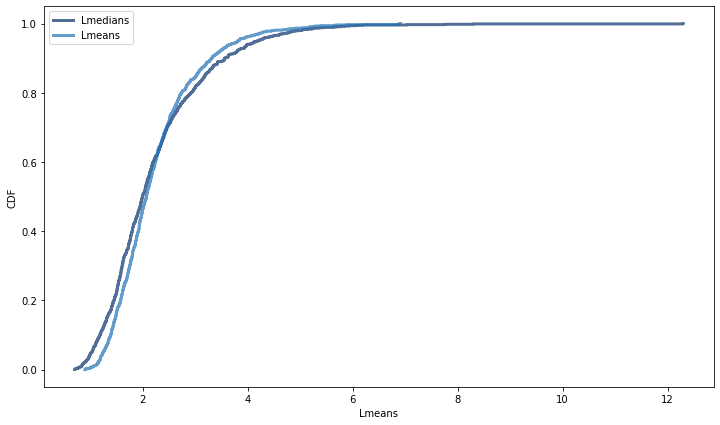

In [7]:
Lmedians = []
Lmeans = []
n = 10
l = 2

for i in range(1000):
    distribution = np.random.exponential(1/l, n)
    Lmedians.append(np.log(2)/np.median(distribution))
    Lmeans.append(1 / np.mean(distribution))
    
cdf0 = thinkstats2.Cdf(Lmedians, label='Lmedians')
plt.figure(figsize = (12,7))
thinkplot.Cdf(cdf0)
thinkplot.Config(xlabel='Lmedians', ylabel='CDF', loc='upper left')

cdf1 = thinkstats2.Cdf(Lmeans, label='Lmeans')
thinkplot.Cdf(cdf1)
thinkplot.Config(xlabel='Lmeans', ylabel='CDF', loc='upper left')

l0 = mse(Lmedians, 2, k = 2)
l1 = mse(Lmeans, 2, k = 2)

print('Standard error: (Medians)', l0**0.5) # RMSE
print('Standard error: (Means)', l1**0.5) # RMSE
print()
print('Confidence interval (CI): (Medians)', cdf0.Percentile(5),'-',cdf0.Percentile(95))
print('Confidence interval (CI): (Means)', cdf1.Percentile(5),'-',cdf1.Percentile(95))

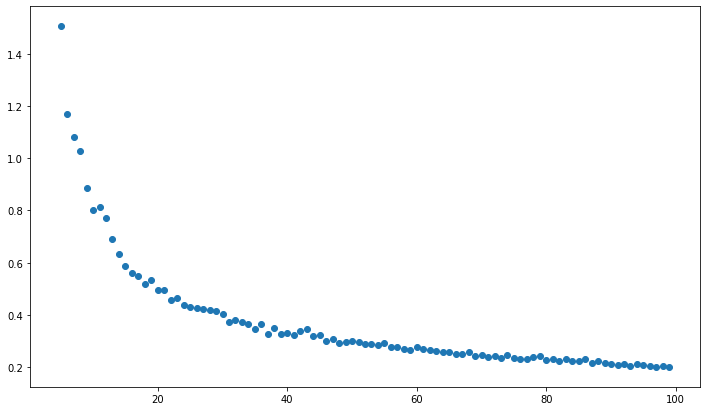

In [8]:
ns = list(range(5, 100))
errors = []
for n in ns:
    Ls = []
    l = 2

    for i in range(1000):
        distribution = np.random.exponential(1/l, n)
        Ls.append(1 / np.mean(distribution))

    errors.append(mse(Ls, l, k = 2)**0.5) 

plt.figure(figsize = (12,7))
plt.scatter(ns, errors)
plt.show()

## 3) 

In games like hockey and soccer, the time between goals is roughly exponential. So you could estimate a team’s goal-scoring rate by observing the number of goals they score in a game. This estimation process is a little different from sampling the time between goals, so let’s see how it works.

Write a function that takes a goal-scoring rate, `lam`, in goals per game, and simulates a game by generating the time between goals until the total time exceeds 1 game, then returns the number of goals scored.

Write another function that simulates many games, stores the estimates of `lam`, then computes their mean error and RMSE.

Is this way of making an estimate biased?

In [9]:
import random

In [10]:
def SimulateGame(lam):
    """Simulates a game and returns the estimated goal-scoring rate.

    lam: actual goal scoring rate in goals per game
    """
    goals = 0
    t = 0
    ts = []
    while True:
        time_between_goals = random.expovariate(lam)
        t += time_between_goals
        ts.append(time_between_goals)
        if t > 1:
            break
        goals += 1

    return goals, ts

In [11]:
t = SimulateGame(3)
t

(4,
 [0.011237686178574563,
  0.20876100440488432,
  0.10668778204774042,
  0.5209747735984841,
  0.21417350323744863])

In [12]:
def SimulateGames(games, lam):
    goals = []
    for game in range(games):
        sim = SimulateGame(lam)
        goals.append(sim[0])
        Ls.append(1 / np.mean(sim[1]))
    return goals, Ls

In [13]:
l = 2
t = SimulateGames(10000, l)
rmse_gol = mse(t[0], l, k = 2)**0.5
rmse_ls = mse(t[1], l, k = 2)**0.5
print('Goles: ', rmse_gol)
print('Ls: ', rmse_ls)

Goles:  1.4359317532529183
Ls:  1.1767844503214708


**Javier Fernandez Suarez**